In [1]:
import joblib
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [2]:
x_train = joblib.load("../artifacts/x_train.pkl")
x_test  = joblib.load("../artifacts/x_test.pkl")
y_train = joblib.load("../artifacts/y_train.pkl")
y_test  = joblib.load("../artifacts/y_test.pkl")

In [3]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
n_estimators_list = [10,50,100,500]

In [4]:
accuracy_train_list =[]
accuracy_test_list =[]

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42).fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)



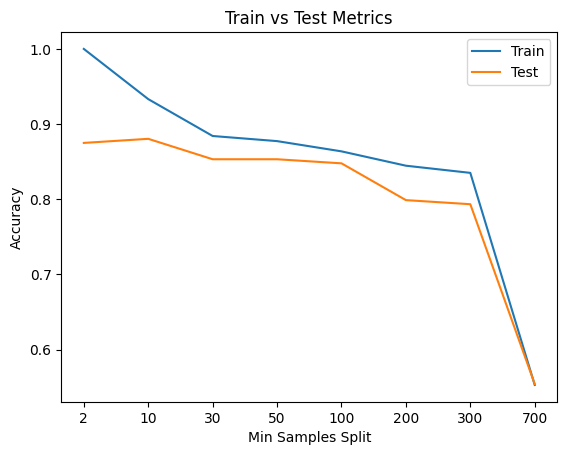

In [6]:
plt.title("Train vs Test Metrics")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_test_list)
plt.legend(['Train','Test '])

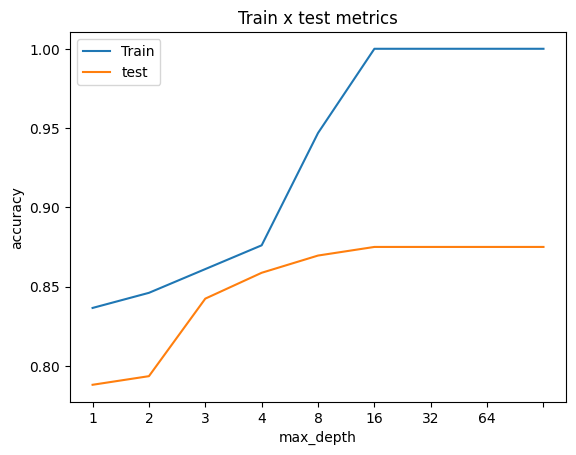

In [8]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 42).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','test'])

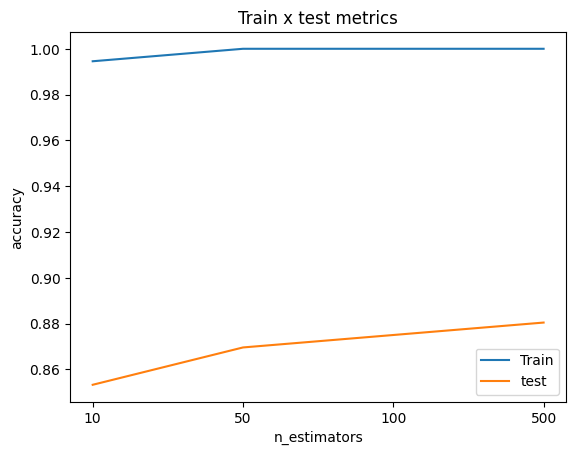

In [9]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 42).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','test'])

In [10]:
random_forest_model = RandomForestClassifier(min_samples_split=10, max_depth=16, n_estimators=50, random_state=42).fit(x_train, y_train)
y_test_pred = random_forest_model.predict(x_test)
y_test_prob = random_forest_model.predict_proba(x_test)[:,1]


In [11]:
accuracy  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
roc_auc   = roc_auc_score(y_test, y_test_prob)

print("Accuracy :", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall   :", round(recall, 3))
print("ROC-AUC  :", round(roc_auc, 3))

Accuracy : 0.88
Precision: 0.87
Recall   : 0.922
ROC-AUC  : 0.931


In [12]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[68, 14],
       [ 8, 94]])

In [13]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [15]:
import os

os.makedirs("../artifacts", exist_ok=True)

metrics = {
    "model": "Random Forest",
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "roc_auc": roc_auc
}

with open("../artifacts/metrics_random_forest.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Random Forest metrics saved")


Random Forest metrics saved
